In [41]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR,ARResults
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

ImportError: cannot import name 'ARMA' from 'statsmodels.tsa.ar_model' (C:\Users\alejandro\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py)

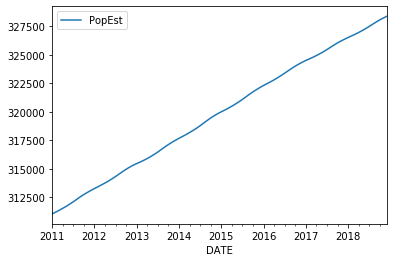

In [6]:
df = pd.read_csv('df/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

df.plot()

In [10]:
train_len = int(len(df)*0.9)
train = df.iloc[:train_len]
test = df.iloc[train_len:]


# AR 

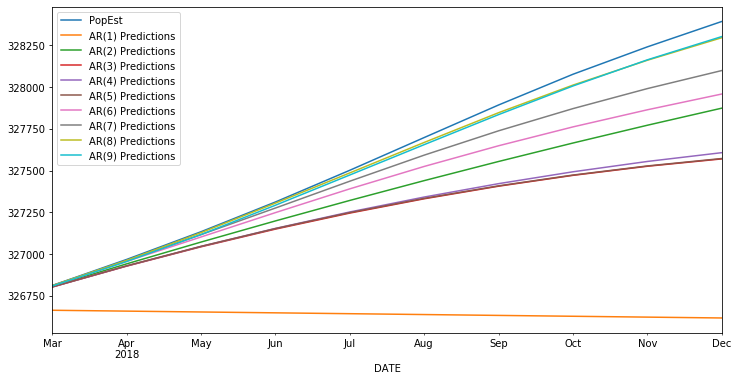

In [27]:
test['PopEst'].plot(legend=True)
predictions_result = {}
for lag in range(1,10):
    model = AR(train['PopEst'])
    fit_model = model.fit(maxlag=lag,method='mle')
    #print(f'Lag: {fit_model.k_ar} Coefficients:{fit_model.params}')

    start=len(train)
    end=len(train)+len(test)-1
    predictions = fit_model.predict(start=start, end=end, dynamic=False).rename('AR({}) Predictions'.format(lag))
    predictions_result[lag] = predictions
    predictions.plot(legend=True,figsize=(12,6));

## El modelo elige p

In [22]:
ARfit = model.fit(ic='bic')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 12
Coefficients:
const         97.423466
L1.PopEst      2.313775
L2.PopEst     -2.157127
L3.PopEst      1.485580
L4.PopEst     -1.299665
L5.PopEst      1.160950
L6.PopEst     -1.090343
L7.PopEst      1.181039
L8.PopEst     -0.987525
L9.PopEst      0.941101
L10.PopEst    -1.149080
L11.PopEst     1.087616
L12.PopEst    -0.486631
dtype: float64


## Calcular mean square error MSA

In [32]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(7)','AR(8)']
preds = [predictions_result[1], predictions_result[7], predictions_result[8]] 

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1210709.529
AR(7) Error:  23205.8228
AR(8) Error: 2345.442289


## Prediccion del modelo

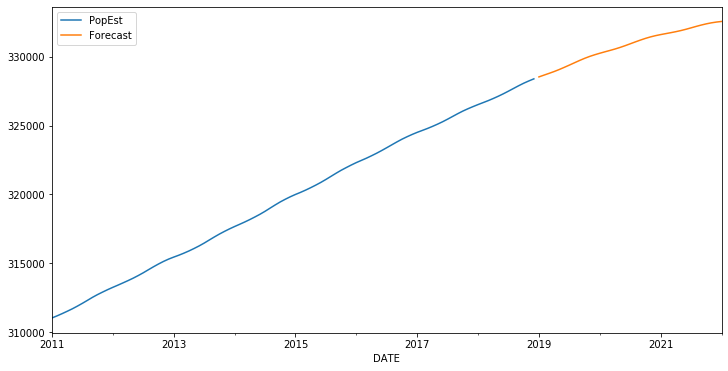

In [36]:
model = AR(df['PopEst'])
ARfit = model.fit(maxlag=8,method='mle')

fcast = ARfit.predict(start=len(df), end=len(df)+36, dynamic=False).rename('Forecast')

df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));